In [1]:
%%javascript 
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
%autoreload 2
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

In [3]:
from __future__ import print_function
import pandas as pd
import h5py
import sys
sys.path.append("../")
import extract_catalog as ec
import get_DM_centroids as getDM
import get_gal_centroids as getgal
import seaborn as sns

/Users/karenyng/Documents/illustris_analyses/code/IlEnv/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
import compute_distance as compDist
import plot_DM_prop as plotDM
import plot_gal_prop as plotgal

In [5]:
sns.set_style('white')

In [6]:
data_path = "../../data/"

In [68]:
# main datafile
main_h5 = h5py.File(
    data_path + 
    "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135.hdf5", 
    "r")

total_clstNo = 2
date_stamp = '05_23_16'


# load the data

In [76]:
# DM_df = \
#     pd.read_hdf(
#        data_path + "test_DM_peaks_df_clst{0}_{1}.h5".format(
#            total_clstNo, date_stamp), "peak_df")
DM_fhats = \
    h5py.File(
        data_path + "test_DM_fhat_clst{0}_{1}.h5".format(
            total_clstNo, date_stamp), 'r')
    
# star_df = \
#     pd.read_hdf(
#        data_path + "test_stars_peak_df_clst{0}_{1}.h5".format(
#            total_clstNo, date_stamp), "peak_df")
    
star_fhats = \
    h5py.File(
        data_path + "test_stars_fhat_clst{0}_{1}.h5".format(
            total_clstNo, date_stamp), 'r')

# figure out how the centroids and the shrinking aperture worked

In [47]:
date_stamp = '05_23_16'
star_fhats = \
    h5py.File(
        data_path + "test_stars_fhat_clst{0}_{1}.h5".format(
            total_clstNo, date_stamp), 'r')

star_fhat_path_lists = compDist.retrieve_cluster_path(star_fhats)
star_fhat = star_fhats[star_fhat_path_lists[0]]

In [70]:
DM_metadata = getDM.retrieve_DM_metadata_from_gal_h5file(star_fhats)

In [71]:
clstNo_list = np.unique([int(p.split('/')[0]) 
                         for p in star_fhat_path_lists]
                       )

In [72]:
R200C = main_h5["Group"]['Group_R_Crit200'][:clstNo_list[-1] + 1]

# try plotting galaxy KDE 

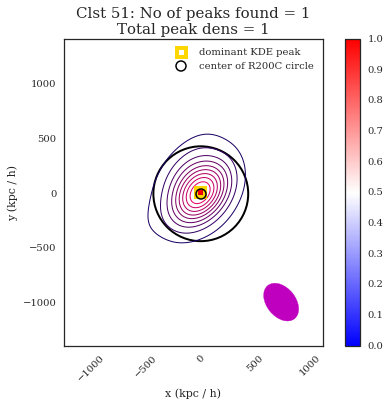

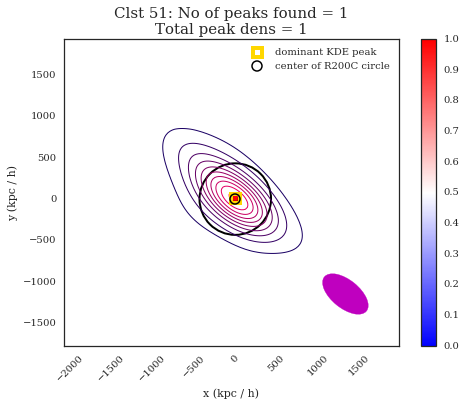

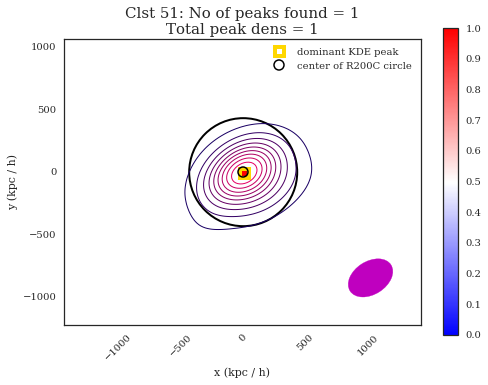

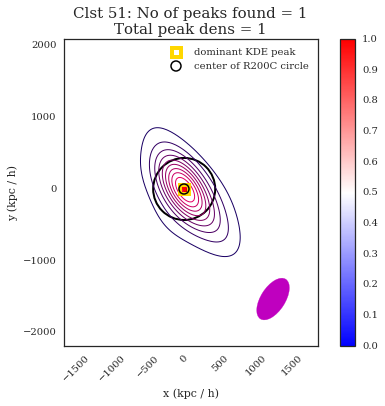

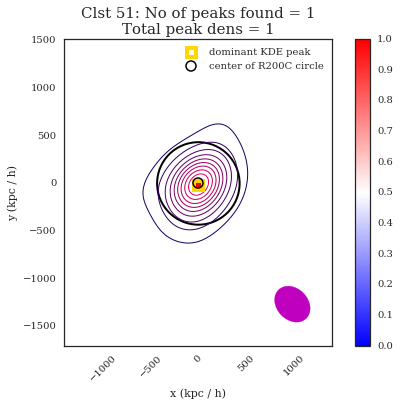

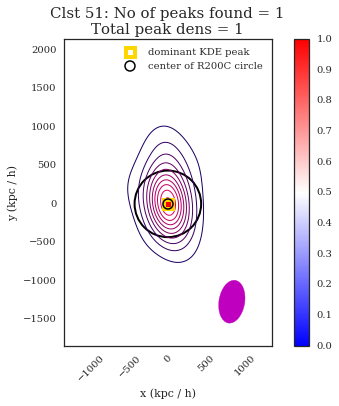

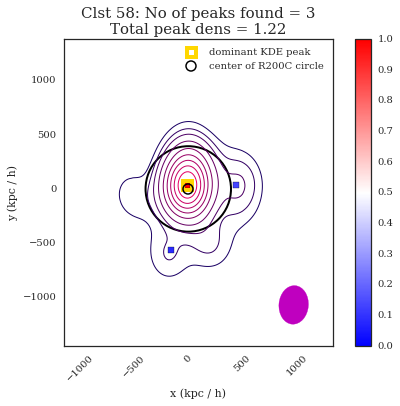

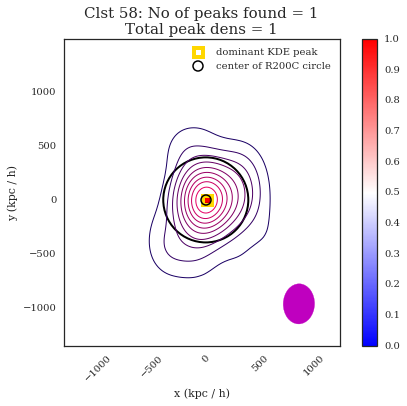

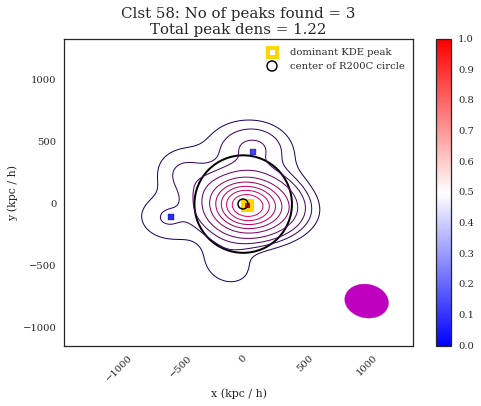

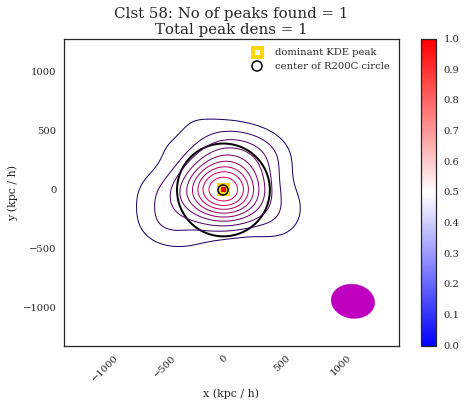

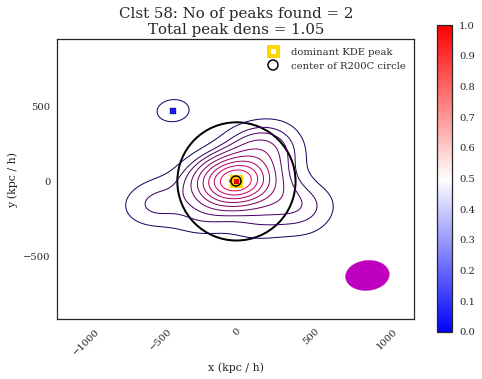

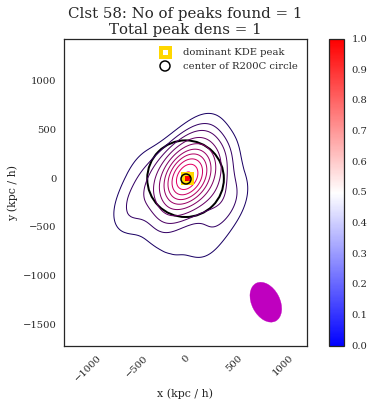

In [64]:
for path in star_fhat_path_lists:
    # the path specifies all the metadata info about projection
    fhat = star_fhats[path]
    clstNo = int(path.split('/')[0])
    
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    plotgal.plot_KDE_peaks(
        fhat, allPeaks=True, R200C=R200C[clstNo],
        showData=True, clstNo=clstNo, ax=ax, fig=fig,
        plotDataPoints=False, save=False
    )


# we have 2 sets of DM density estimates 

this is due to two different kernel width

In [77]:
DM_fhat_path = []
DM_fhats.visit(DM_fhat_path.append)

In [ ]:
star_fhat_path = []
star_fhat.visit(star_fhat_path.append)

# Visualize the smoothed and not smoothed histograms

In [73]:
# star_gpbykeys = compDist.retrieve_metadata_from_fhat_as_path(star_fhat)
# DM_gpbykeys = compDist.retrieve_metadata_from_fhat_as_path(DM_fhat)

In [78]:
# DM_gpBy_key_no = len(DM_gpbykeys)
DM_path_list = \
    compDist.retrieve_cluster_path(DM_fhats)
    
# star_gpBy_key_no = len(star_gpbykeys)

In [79]:
DM_path_list

[u"51/mag/i_band/1/('0.8410686706', '0.7853981634')/0.0",
 u"51/mag/i_band/1/('0.8410686706', '0.7853981634')/25.0",
 u"51/mag/i_band/1/('0.8410686706', '2.3561944902')/0.0",
 u"51/mag/i_band/1/('0.8410686706', '2.3561944902')/25.0",
 u"51/mag/i_band/1/('0.8410686706', '3.9269908170')/0.0",
 u"51/mag/i_band/1/('0.8410686706', '3.9269908170')/25.0",
 u"51/mag/i_band/1/('0.8410686706', '5.4977871438')/0.0",
 u"51/mag/i_band/1/('0.8410686706', '5.4977871438')/25.0",
 u"51/mag/i_band/1/('1.5707963268', '0.0000000000')/0.0",
 u"51/mag/i_band/1/('1.5707963268', '0.0000000000')/25.0",
 u"51/mag/i_band/1/('1.5707963268', '1.5707963268')/0.0",
 u"51/mag/i_band/1/('1.5707963268', '1.5707963268')/25.0",
 u"58/mag/i_band/1/('0.8410686706', '0.7853981634')/0.0",
 u"58/mag/i_band/1/('0.8410686706', '0.7853981634')/25.0",
 u"58/mag/i_band/1/('0.8410686706', '2.3561944902')/0.0",
 u"58/mag/i_band/1/('0.8410686706', '2.3561944902')/25.0",
 u"58/mag/i_band/1/('0.8410686706', '3.9269908170')/0.0",
 u"58/

# get groupby keys

In [ ]:
# DM_gpBy = DM_df.groupby(DM_gpbykeys, as_index=False)

In [ ]:
star_fhat[]

In [81]:
star_path

u"51/mag/i_band/1/('0.8410686706', '0.7853981634')"

In [83]:
star_fhats

<HDF5 file "test_stars_fhat_clst2_05_23_16.h5" (mode r)>


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545

Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


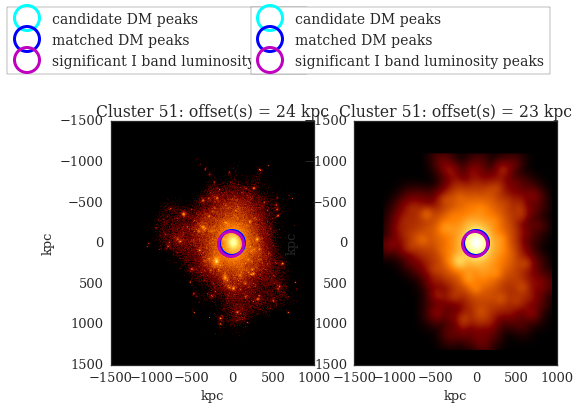


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545

Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


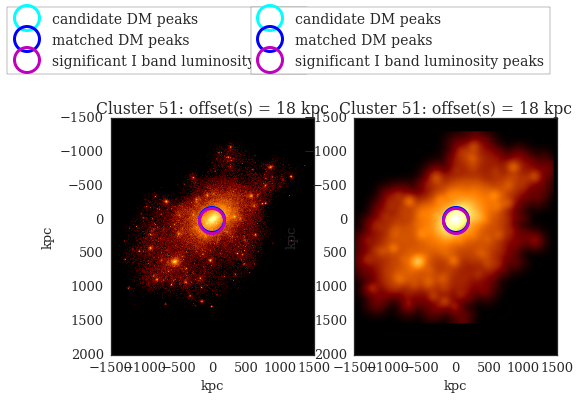


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545

Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


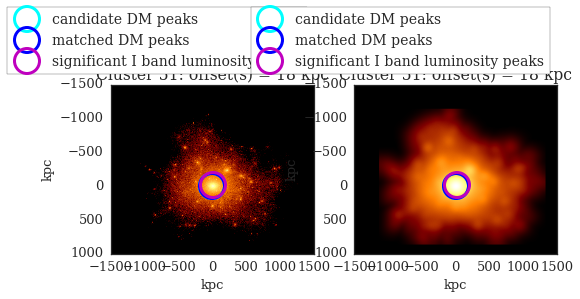


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545

Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


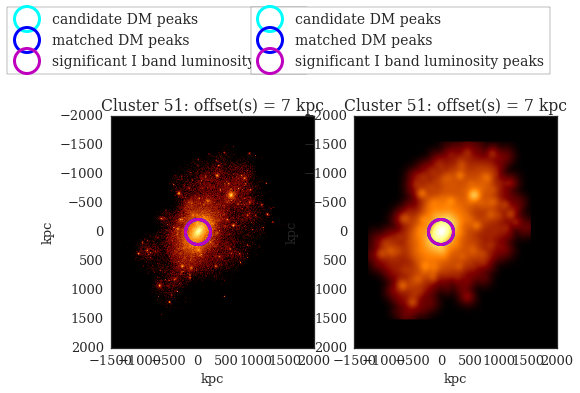


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545

Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


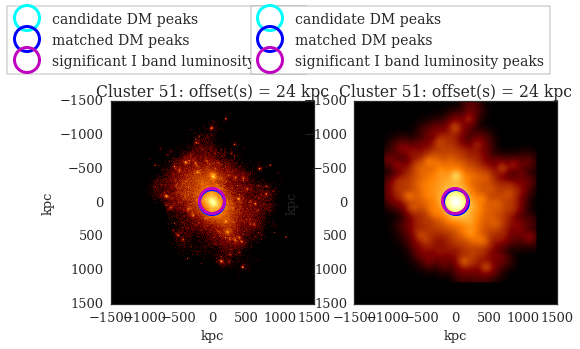


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545

Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


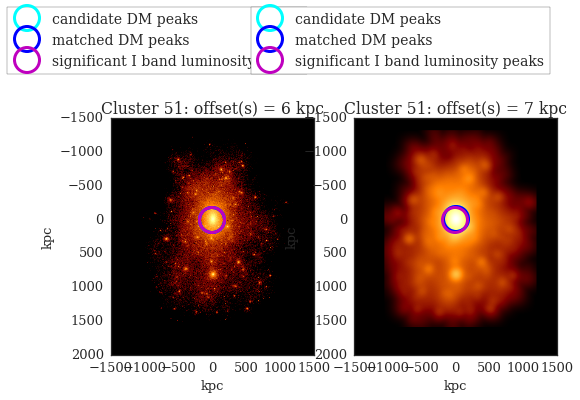


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545

Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


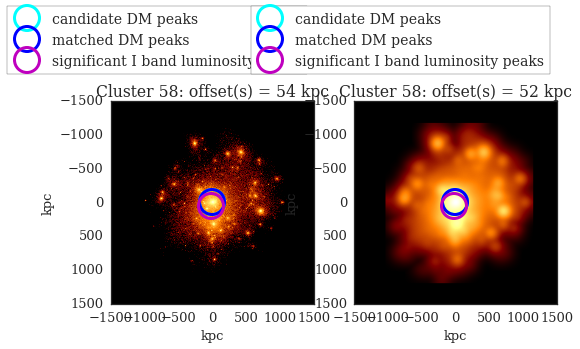


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545

Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


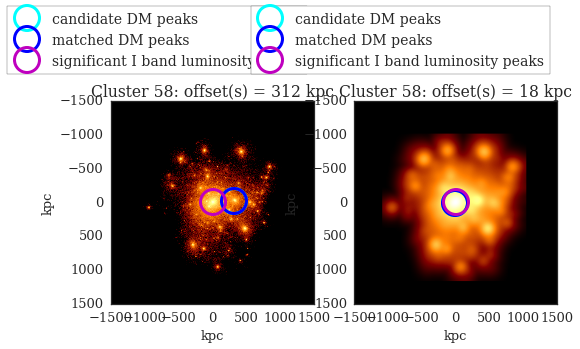


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545

Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


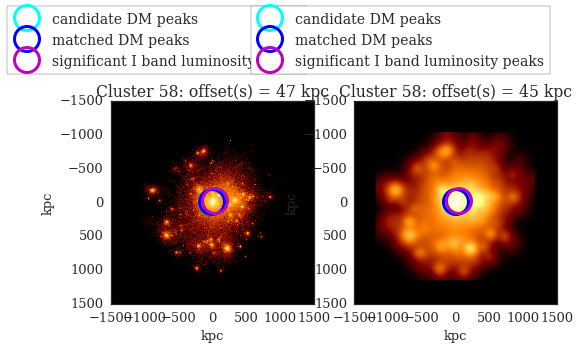


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545

Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


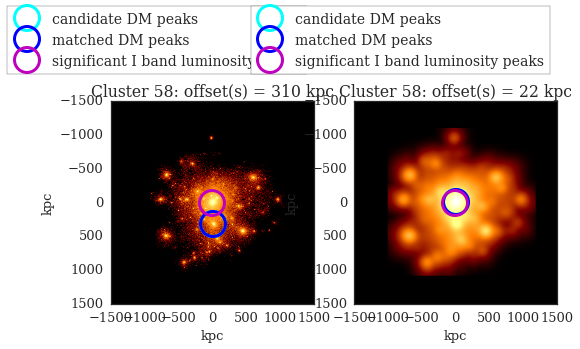


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545

Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


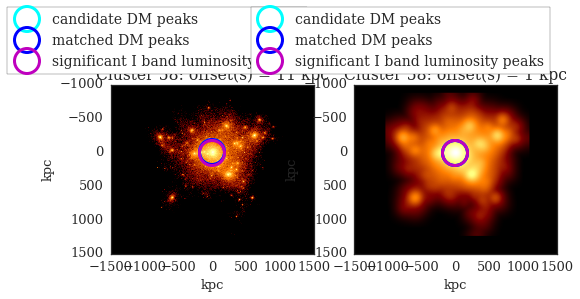


Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545

Converting unit of kpc / h to kpc for galaxy data using 
1.42045454545


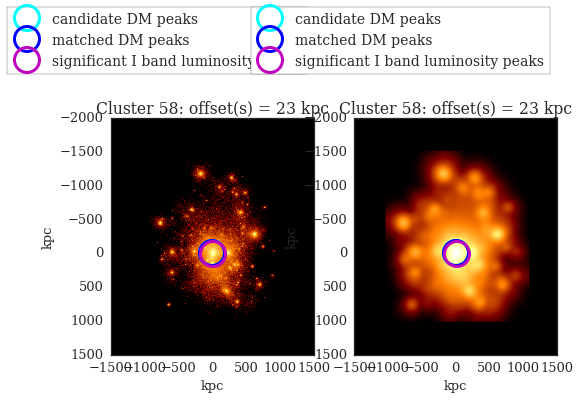

In [94]:
for index in range(len(DM_path_list) / 2):

    fig = plt.figure()
    ax1 = fig.add_subplot(121, axisbg='black', aspect='equal')
    
    path1 = DM_path_list[2 * index]
    star_path = '/'.join(path1.split('/')[:-1])
    clstNo = path1.split('/')[0]
    ## DM_clst_dict = \
    #    compDist.combine_DM_df_and_h5_to_dict(
    #        DM_gpBy, DM_fhat, path1)
    #star_dict = compDist.get_star_dict_from_run(
    #    star_df, star_fhat, path1, star_gpBy_key_no)
    DM_clst_dict = DM_fhats[path1]
    star_dict = star_fhats[star_path]
    
    plotDM.plot_DM_fhat(
        fhat=DM_clst_dict, fhat_stars=star_dict, clstNo=clstNo, ax=ax1)
    
    ax2 = fig.add_subplot(122, axisbg='black', aspect='equal')
    path2 = DM_path_list[2 * index + 1]
    clstNo = path2.split('/')[0]
    
    DM_clst_dict = DM_fhats[path2]
    # DM_clst_dict = \
    #    compDist.combine_DM_df_and_h5_to_dict(
    #         DM_gpBy, DM_fhat, path2)
    # star_dict = compDist.get_star_dict_from_run(
    #    star_df, star_fhat, path2, star_gpBy_key_no)
    plotDM.plot_DM_fhat(
        fhat=DM_clst_dict, fhat_stars=star_dict, clstNo=clstNo, ax=ax2, 
        log_scale=False)
    
    plt.show()
    plt.close()